In [1]:
import os

from PIL import Image, ImageDraw, ImageFont, ImageFilter

from pathlib import Path

from pdf2image import convert_from_path


In [2]:

library_path = Path(os.getcwd()).parent

logos_path = library_path / 'logos'
flags_path = library_path / 'flags' / 'png'

In [11]:
def create_individual_badge(participant: str, institution: str, text_size: int, conference_name: str, conference_font_size: int, left_logo_path: Path, right_logo_path: Path, bottom_logo_path: Path, left_logo_size: tuple, right_logo_size: tuple, bottom_logo_size: tuple, background_text: str, background_text_color: tuple, background_text_font_size: int = 400, badge_width: int = 1063, badge_height: int = 638, background_color: str = "#FFFFF0", output_path: Path = None) -> None:

    # Badge dimensions for 300 PPI printer
    width, height = badge_width, badge_height
    badge = Image.new("RGB", (width, height), background_color)

    # Load logos
    logo_left = Image.open(left_logo_path)
    logo_right = Image.open(right_logo_path)
    logo_bottom = Image.open(bottom_logo_path)

    # Resize logosonf_name = 'Annual Meeting of GEoPD'
    logo_left = logo_left.resize(left_logo_size)
    logo_right = logo_right.resize(right_logo_size)
    logo_bottom = logo_bottom.resize(bottom_logo_size)

    # Blurred text
    font = ImageFont.truetype("DejaVuSerif-Bold.ttf", background_text_font_size)
    text_image = Image.new("RGBA", (width, height), (255, 255, 255, 0))
    
    draw = ImageDraw.Draw(text_image)
    
    text_bbox = draw.textbbox((0, 0), background_text, font=font)
    text_width, text_height = text_bbox[2] - text_bbox[0], text_bbox[3] - text_bbox[1]

    # Draw the background text in the center
    draw.text(
        ((width - text_width) // 2, (height - text_height) // 2-100),
        background_text,
        font=font,
        fill=background_text_color
    )

    # Apply a blur to the text image
    blurred_text = text_image.filter(ImageFilter.GaussianBlur(1))

    # Paste the blurred text onto the badge
    badge.paste(blurred_text, (0, 0), blurred_text)

    # Paste logos onto the badge
    badge.paste(logo_left, (20, 20))  # Upper left corner
    badge.paste(logo_right, (width - right_logo_size[0] - 20, 20))  # Upper right corner
    badge.paste(logo_bottom, ((width - bottom_logo_size[0]) // 2, height - bottom_logo_size[1] - 20))  # Bottom center

    # Add text (name, title, etc.)
    draw = ImageDraw.Draw(badge)

    conference_font = ImageFont.truetype("DejaVuSerif-Bold.ttf", conference_font_size)

    # Get the size of the text for proper centering
    text_bbox = draw.textbbox((0, 0), conference_name, font=conference_font)
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]

    # Position at top of image
    top_margin = 20  # pixels from top
    x = (width - text_width) // 2 +50  # Center horizontally
    y = top_margin +50 # Position from top

    # Draw the text
    draw.text((x, y), conference_name, font=conference_font, fill="black")

    # Text to display
    text = f"{participant}\n{institution}"

    text_font = ImageFont.truetype("DejaVuSerif-Bold.ttf", text_size)

    # Draw the text in the center
    draw.text((width // 2 - 100, height // 2 - 40), text, font=text_font, fill="black")


    # Save the badge
    if output_path is not None:
        badge.save(output_path)

    return badge

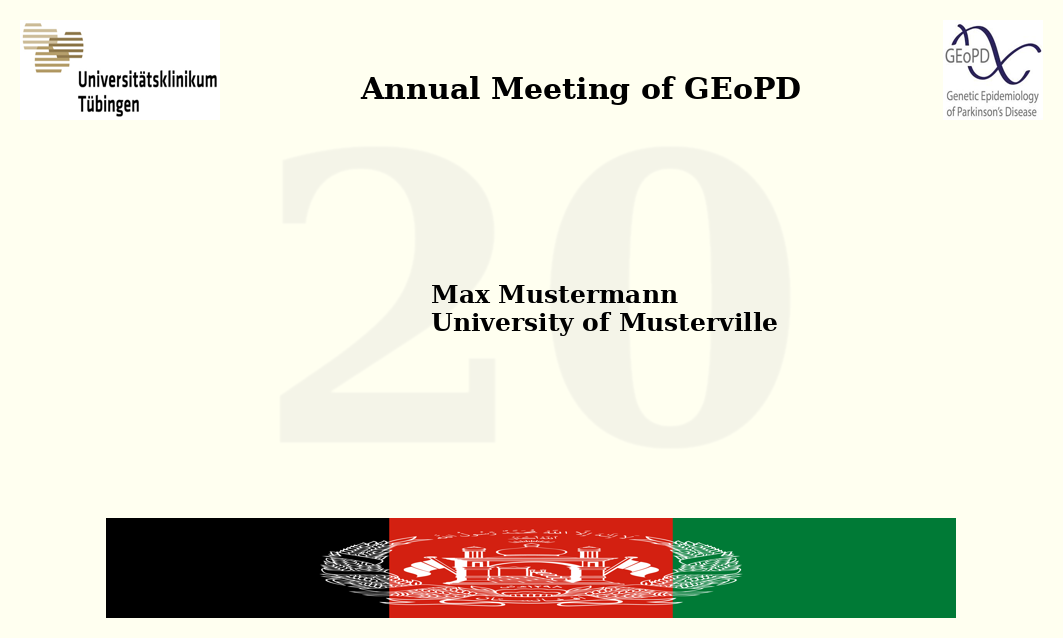

In [13]:
create_individual_badge(
    left_logo_path= logos_path / "Logo_UKT_neu_2019.jpg",
    right_logo_path= logos_path / 'geopd.jpeg',
    bottom_logo_path= flags_path / 'Flag_of_Afghanistan.png',
    left_logo_size=(200, 100), # UKT
    right_logo_size=(100, 100), # GEoPD
    bottom_logo_size=(int(1063*0.8), 100), # flag
    background_text='20',
    background_text_color=(200, 200, 200, 50), # Light gray with transparency
    conference_name='Annual Meeting of GEoPD',
    conference_font_size=30,
    text_size=25,
    participant='Max Mustermann',
    institution='University of Musterville',
    output_path= library_path / 'badges_files' / "badge.png"
)

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import math

# Define your image size
img_width, img_height = 1063, 638

# Define page and margins in mm
page_width_mm, page_height_mm = 210, 297  # A4 paper size
top_margin_mm = bottom_margin_mm = 12
left_margin_mm = right_margin_mm = 15

# Convert to pixels (assuming 300 PPI as per your earlier calculation)
ppi = 300
mm_to_px = ppi / 25.4  # 25.4 mm per inch

page_width_px = int(page_width_mm * mm_to_px)
page_height_px = int(page_height_mm * mm_to_px)
top_margin_px = int(top_margin_mm * mm_to_px)
bottom_margin_px = int(bottom_margin_mm * mm_to_px)
left_margin_px = int(left_margin_mm * mm_to_px)
right_margin_px = int(right_margin_mm * mm_to_px)

# Calculate available space for images
available_width = page_width_px - left_margin_px - right_margin_px
available_height = page_height_px - top_margin_px - bottom_margin_px

# Calculate how many images can fit per row and column with some spacing
spacing_px = int(0.5 * mm_to_px)  # 2mm spacing between images

# Create the page
page = Image.new("RGB", (page_width_px, page_height_px), "#FFFFFF")
draw = ImageDraw.Draw(page)



In [15]:
image_lst = []

for k in range(10):
    img = create_individual_badge(
    left_logo_path= logos_path / "Logo_UKT_neu_2019.jpg",
    right_logo_path= logos_path / 'geopd.jpeg',
    bottom_logo_path= flags_path / 'Flag_of_Afghanistan.png',
    left_logo_size=(200, 100), # UKT
    right_logo_size=(100, 100), # GEoPD
    bottom_logo_size=(int(1063*0.8), 100), # flag
    background_text='20',
    background_text_color=(200, 200, 200, 50), # Light gray with transparency
    conference_name='Annual Meeting of GEoPD',
    conference_font_size=30,
    text_size=25,
    participant=f'Max Mustermann_{k}',
    institution='University of Musterville',
    output_path= library_path / 'badges_files' / f"badge_{k}.png"
)
    image_lst.append(img)

In [16]:
for k in range(10):

    img = image_lst[k]

    # Calculate the position to paste the image
    row = k // 2
    col = k % 2

    x = left_margin_px + col * (img_width + spacing_px)
    y = top_margin_px + row * (img_height + spacing_px)

    # Paste the image onto the page
    page.paste(img, (x, y))

page.save("page_with_ten_images.png")
